In [1]:
# import libraries


import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [2]:
churnData = pd.read_csv("Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
# check data types

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# convert total charge column to an integer

churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors = "coerce")

In [5]:
# check for nulls

churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# replace nulls in total charge column with mean value of this column

churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())

In [7]:
X = churnData[["tenure","SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [8]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Using smote to upsample the data**

In [10]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Yes    4138
No     4138
Name: Churn, dtype: int64

## **Logistic regression**

In [12]:
model = LogisticRegression(random_state=42)

model.fit(X_sm,y_sm)

model.score(X_test, y_test)

0.7416607523066004

<AxesSubplot:>

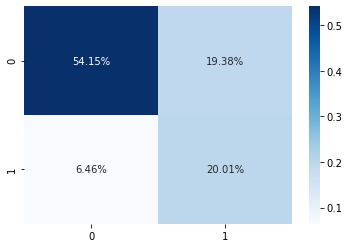

In [14]:
import seaborn as sns

predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')

sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

## **Decision tree**

In [15]:
model = DecisionTreeClassifier()
model.fit(X_sm, y_sm)
model.score(X_test, y_test)

0.7054648687012065

<AxesSubplot:>

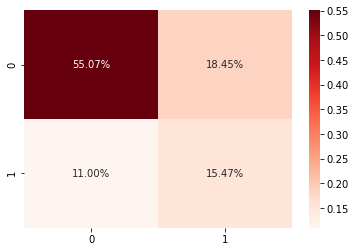

In [16]:
predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')

sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Reds')

**Overall logistic regression and the decision tree return very similar results with smote. Logsistic regession seems to perform a bit better.**

## **Tomek Links downsampling**

In [18]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X_train, y_train)
y_tl.value_counts()

No     3673
Yes    1496
Name: Churn, dtype: int64

## **Logistic regression**

In [19]:
model = LogisticRegression(random_state=42)

model.fit(X_tl,y_tl)

model.score(X_test, y_test)

0.7913413768630234

<AxesSubplot:>

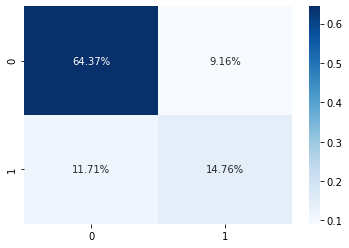

In [20]:
predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')

sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

## **Decision tree**

In [21]:
model = DecisionTreeClassifier()
model.fit(X_tl, y_tl)
model.score(X_test, y_test)

0.7359829666430092

<AxesSubplot:>

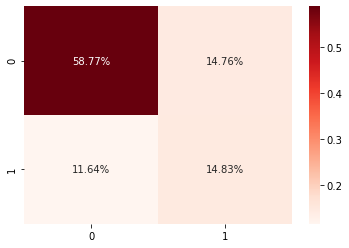

In [22]:
predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')

sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Reds')

**With tomek links logistic regression has the better overall acurracy score and does better at predicting the minority class than the decision tree**